In [3]:
pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
red_wine = pd.read_csv('../Datasets/winequality-red.csv',delimiter=';')

In [4]:
red_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [5]:
white_wine = pd.read_csv('../Datasets/winequality-white.csv', delimiter=';')

In [6]:
white_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [7]:
red_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [9]:
red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [12]:
white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [13]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [30]:
# Quality is our targetted Column :::

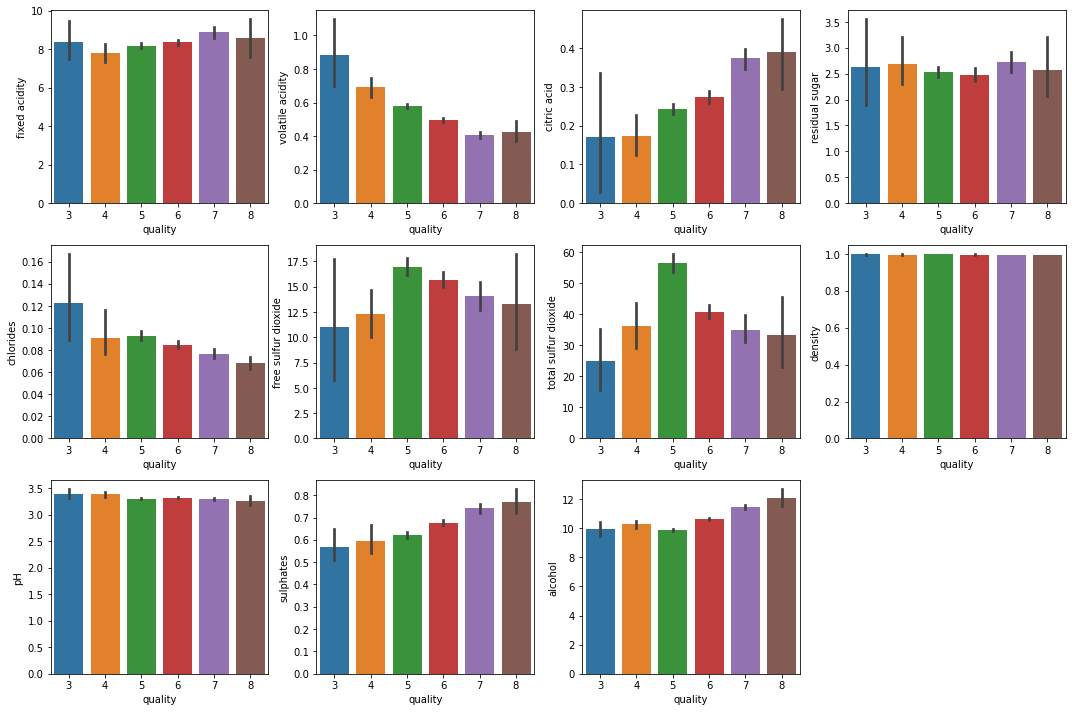

In [21]:
fig= plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=red_wine)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=red_wine)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=red_wine)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=red_wine)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=red_wine)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=red_wine)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=red_wine)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=red_wine)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=red_wine)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=red_wine)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=red_wine)
plt.tight_layout()

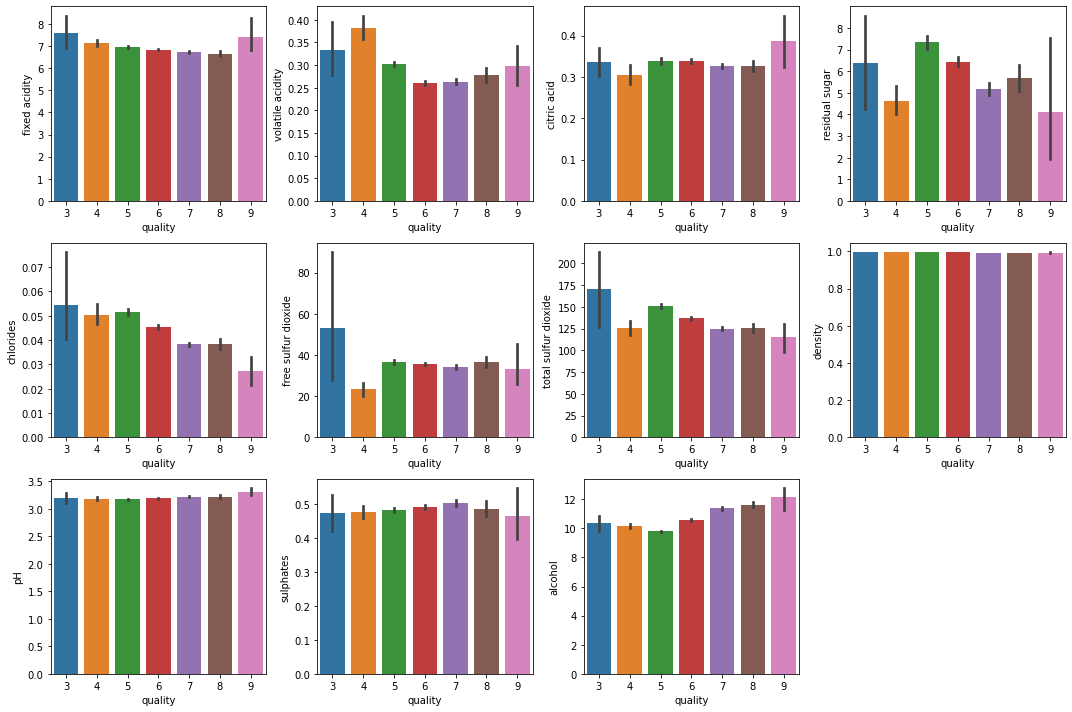

In [20]:
fig= plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=white_wine)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=white_wine)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=white_wine)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=white_wine)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=white_wine)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=white_wine)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=white_wine)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=white_wine)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=white_wine)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=white_wine)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=white_wine)
plt.tight_layout()

In [16]:
temp_red = red_wine[red_wine['quality']>5.5]['volatile acidity']
temp1_red= red_wine[red_wine['quality']<=5.5]['volatile acidity']
print('Quality vs Volatile Acidity','high Quality',temp_red.mean(),'Low Quality',temp1_red.mean())

Quality vs Volatile Acidity high Quality 0.47414619883041 Low Quality 0.5895026881720431


In [17]:
temp_white = white_wine[white_wine['quality']>6]['volatile acidity']
temp1_white= white_wine[white_wine['quality']<=6]['volatile acidity']
print('Quality vs Volatile Acidity','high Quality',temp_white.mean(),'Low Quality',temp1_white.mean())

Quality vs Volatile Acidity high Quality 0.2653490566037743 Low Quality 0.2818017196456489


In [18]:
temp_red = red_wine[red_wine['quality']>5.5]['chlorides']
temp1_red= red_wine[red_wine['quality']<=5.5]['chlorides']
print('Quality vs chlorides','high Quality',temp_red.mean(),'Low Quality',temp1_red.mean())

Quality vs chlorides high Quality 0.08266081871345021 Low Quality 0.09298924731182794


In [23]:
temp_white = white_wine[white_wine['quality']>6]['chlorides']
temp1_white= white_wine[white_wine['quality']<=6]['chlorides']
print('Quality vs chlorides','high Quality',temp_white.mean(),'Low Quality',temp1_white.mean())

Quality vs chlorides high Quality 0.038160377358490497 Low Quality 0.04787467430953647


In [24]:
temp_red = red_wine[red_wine['quality']>5.5]['sulphates']
temp1_red= red_wine[red_wine['quality']<=5.5]['sulphates']
print('Quality vs sulphates','high Quality',temp_red.mean(),'Low Quality',temp1_red.mean())

Quality vs sulphates high Quality 0.6926198830409347 Low Quality 0.618534946236559


In [26]:
temp_white = white_wine[white_wine['quality']>6]['sulphates']
temp1_white= white_wine[white_wine['quality']<=6]['sulphates']
print('Quality vs sulphates','high Quality',temp_white.mean(),'Low Quality',temp1_white.mean())

Quality vs sulphates high Quality 0.5001415094339613 Low Quality 0.4870036477331957


In [27]:
temp_red = red_wine[red_wine['quality']>5.5]['residual sugar']
temp1_red= red_wine[red_wine['quality']<=5.5]['residual sugar']
print('Quality vs residual sugar','high Quality',temp_red.mean(),'Low Quality',temp1_red.mean())

Quality vs residual sugar high Quality 2.535964912280701 Low Quality 2.542069892473117


In [29]:
temp_white = white_wine[white_wine['quality']>6]['residual sugar']
temp1_white= white_wine[white_wine['quality']<=6]['residual sugar']
print('Quality vs residual sugar','high Quality',temp_white.mean(),'Low Quality',temp1_white.mean())

Quality vs residual sugar high Quality 5.2615094339622575 Low Quality 6.703478374153222


In [35]:
temp_red = red_wine[red_wine['quality']>5.5]['total sulfur dioxide']
temp1_red= red_wine[red_wine['quality']<=5.5]['total sulfur dioxide']
print('Quality vs total sulfur dioxide','high Quality',temp_red.mean(),'Low Quality',temp1_red.mean())

Quality vs total sulfur dioxide high Quality 39.35204678362573 Low Quality 54.645161290322584


In [37]:
temp_white = white_wine[white_wine['quality']>6]['total sulfur dioxide']
temp1_white= white_wine[white_wine['quality']<=6]['total sulfur dioxide']
print('Quality vs total sulfur dioxide','high Quality',temp_white.mean(),'Low Quality',temp1_white.mean())

Quality vs total sulfur dioxide high Quality 125.24528301886792 Low Quality 141.98293381969776


In [43]:
temp_red = red_wine[red_wine['quality']>5.5]['free sulfur dioxide']
temp1_red= red_wine[red_wine['quality']<=5.5]['free sulfur dioxide']
print('Quality vs free sulfur dioxide','high Quality',temp_red.mean(),'Low Quality',temp1_red.mean())

Quality vs free sulfur dioxide high Quality 15.27251461988304 Low Quality 16.567204301075268


In [45]:
temp_white = white_wine[white_wine['quality']>6]['free sulfur dioxide']
temp1_white= white_wine[white_wine['quality']<=6]['free sulfur dioxide']
print('Quality vs free sulfur dioxide','high Quality',temp_white.mean(),'Low Quality',temp1_white.mean())

Quality vs free sulfur dioxide high Quality 34.550471698113206 Low Quality 35.51732673267327


In [41]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [42]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

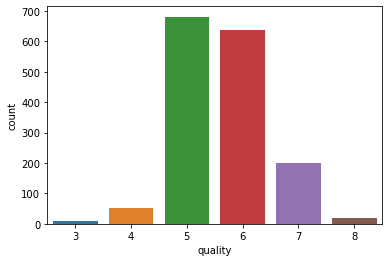

In [46]:
sns.countplot(x='quality',data=red_wine)

<AxesSubplot:xlabel='quality', ylabel='count'>

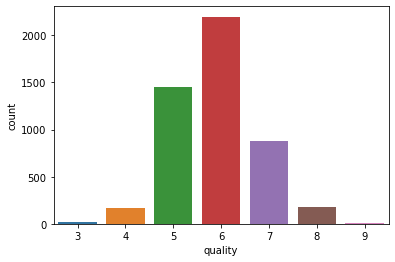

In [47]:
sns.countplot(x='quality',data=white_wine)

In [48]:
# correlated Features::::

<AxesSubplot:>

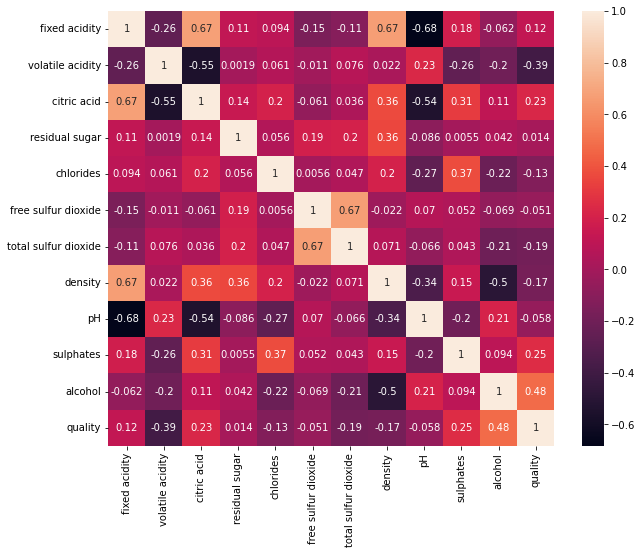

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(red_wine.corr(),annot=True)

<AxesSubplot:>

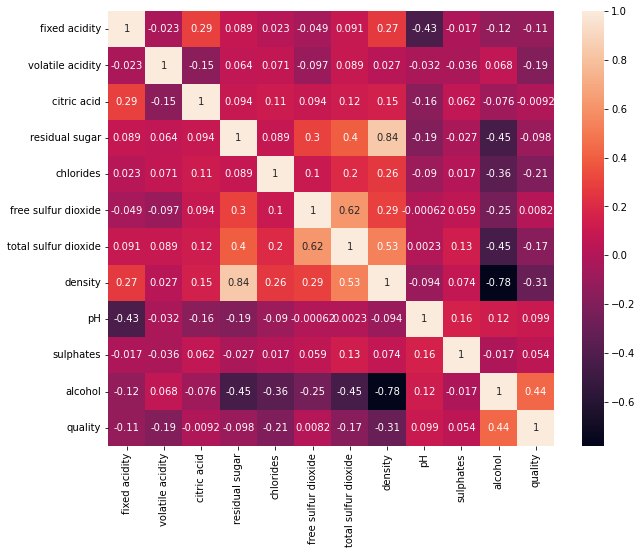

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(white_wine.corr(),annot=True)

<AxesSubplot:>

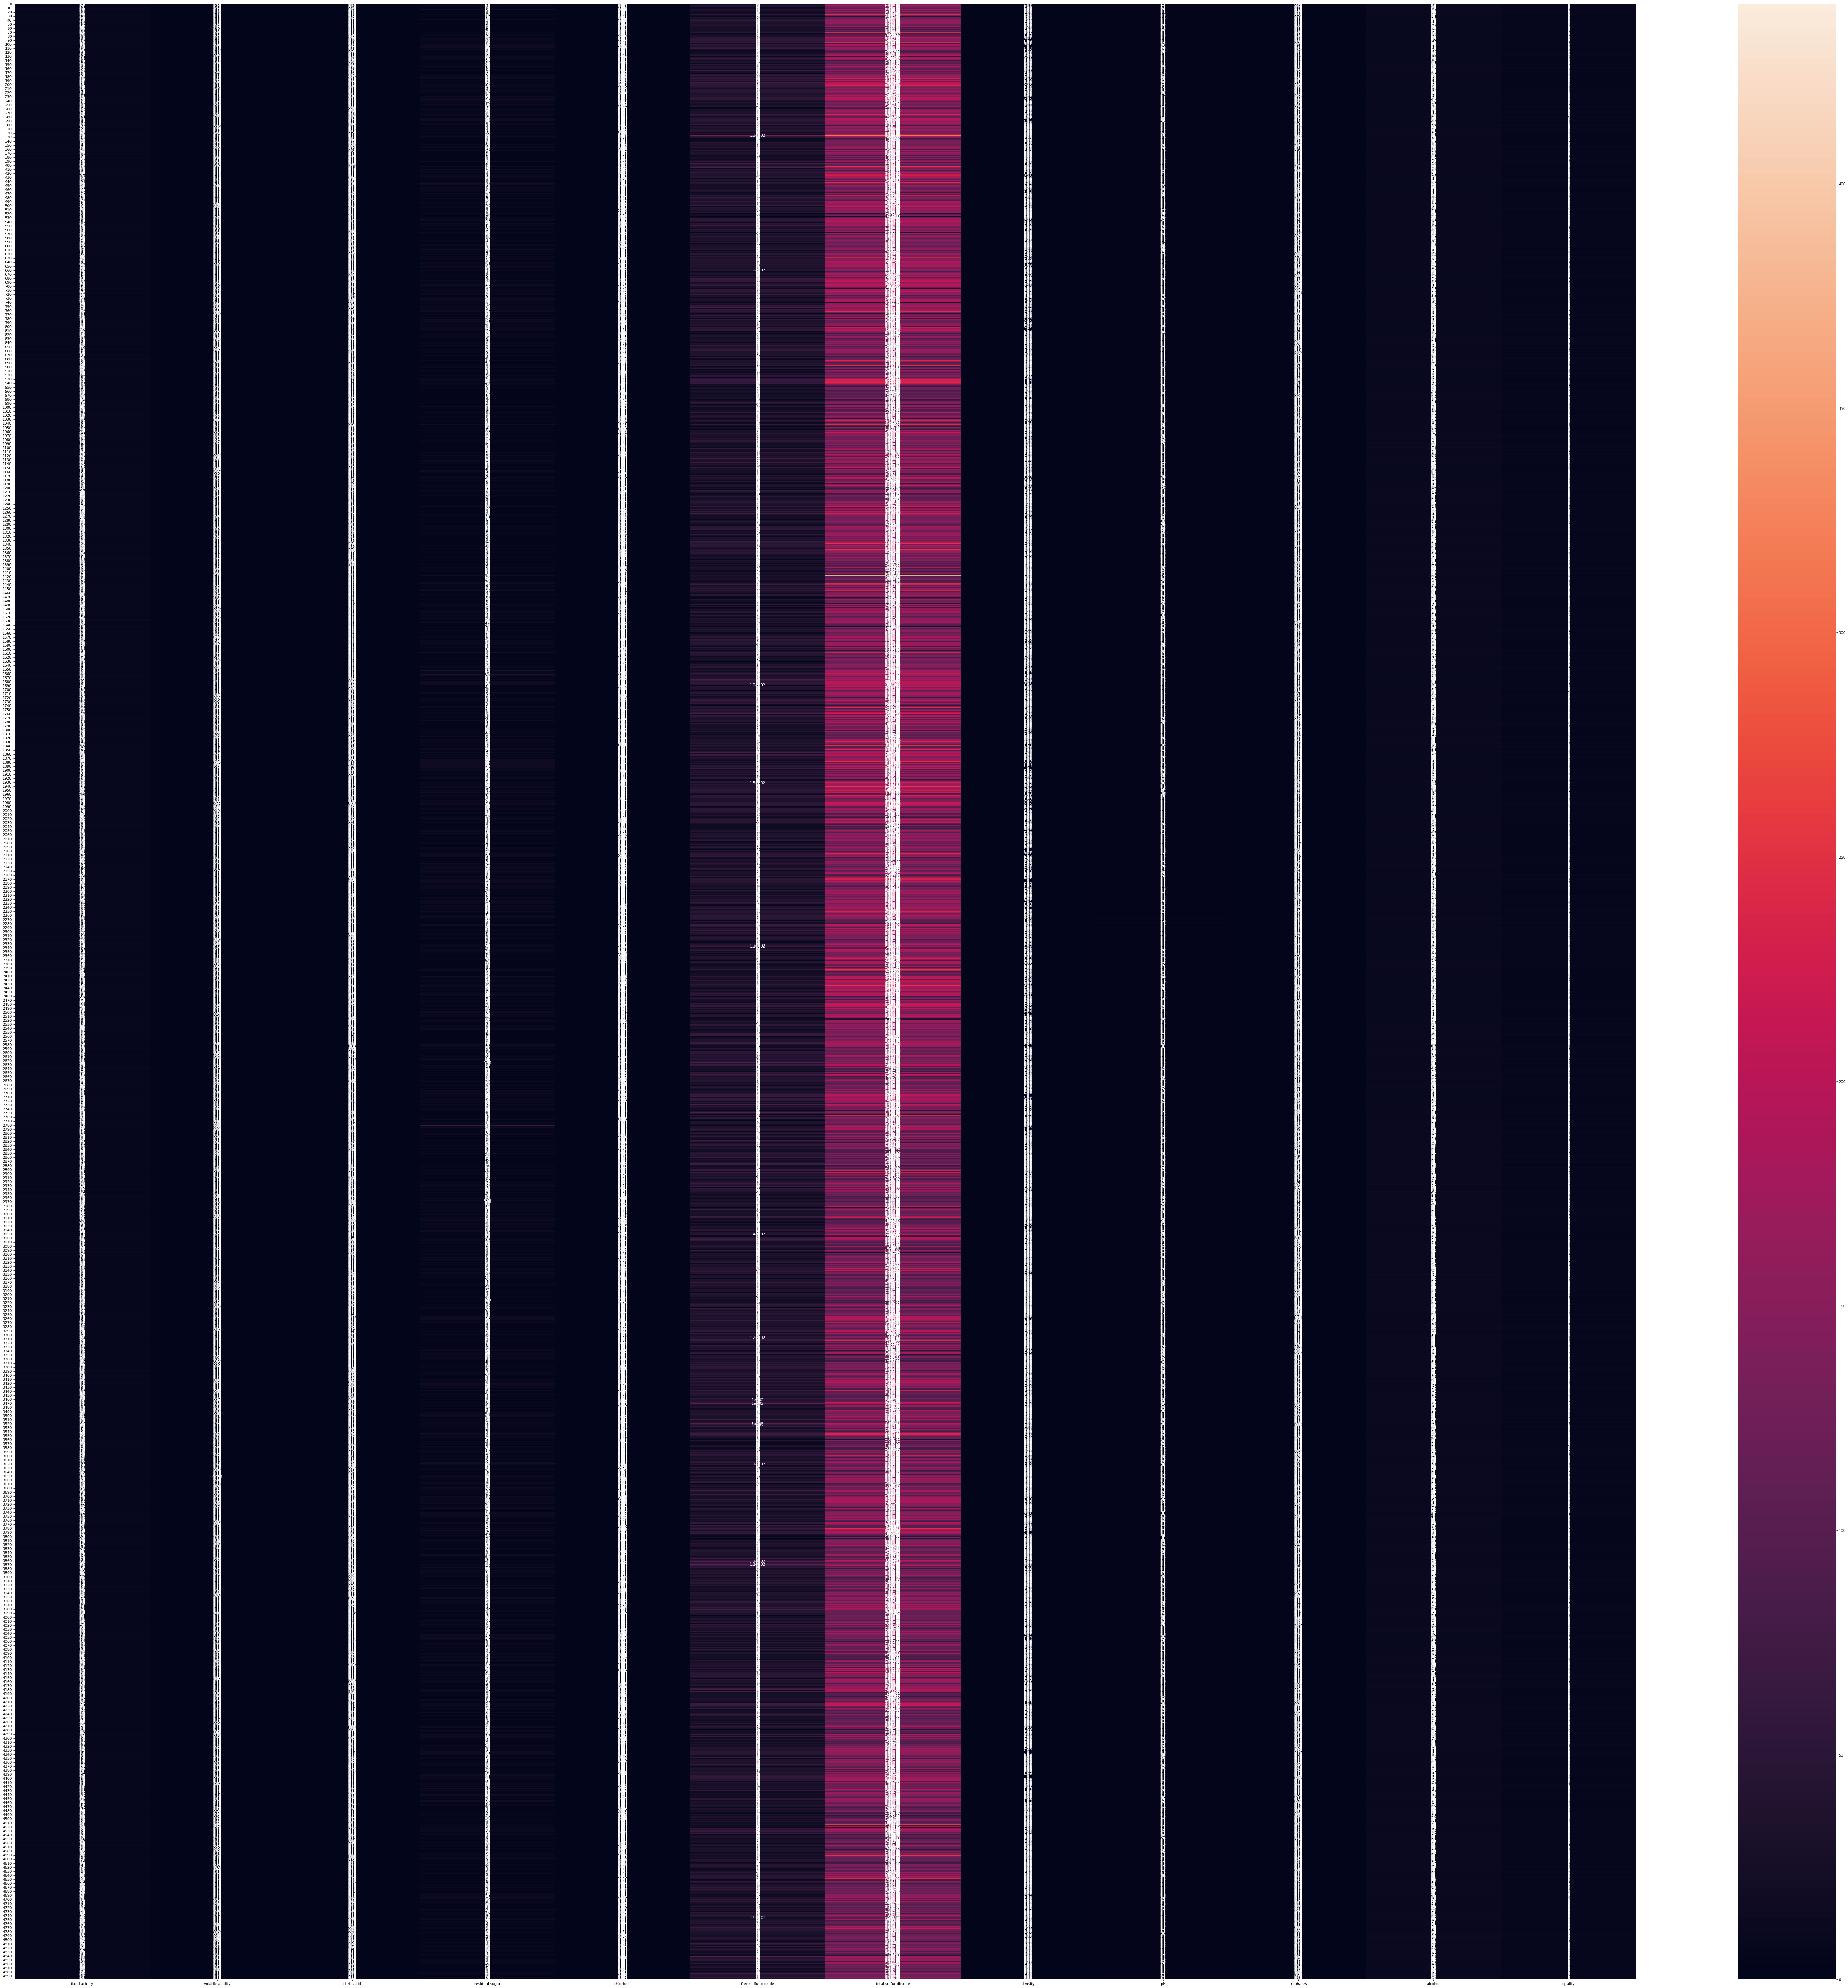

In [52]:
plt.figure(figsize=(100,100))
sns.heatmap(white_wine,annot=True)

In [53]:
# 33:00